In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
default_path = '/content/drive/MyDrive/'

In [2]:
from math import sqrt

In [3]:
from numpy.random import seed
seed(1)
# from tensorflow import set_random_seed
# set_random_seed(1)
import math
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from math import sqrt
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
from numpy.ma.core import ceil
from copy import deepcopy
from tensorflow.keras import optimizers
notebookpath = "/content/drive/MyDrive/StockS_Data/ADANIPORTS.csv"
# notebookpath = "/content/drive/MyDrive/StockS_Data/SMA STD Bol Upper,Lower and also some extra new features.csv"
# notebookpath ="/content/drive/MyDrive/Colab Notebooks/New Adani Datafrae with added features SMA,STD,Bollinger Upper,Bollinger Lower and removed useless features Series and Symbol.csv"
df = pd.read_csv(notebookpath);
# print(help(mean_squared_error))
df
# print(help(tf.keras.optimizers))
# print("-----------------------------------------------------")
# print(help(optimizers))

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [4]:
meantrades = df['Trades'].mean()
print(meantrades)
df['Trades'].fillna(value=meantrades, inplace=True)
 
# df = df.drop(['Volume'], axis = 1)
# df = df.drop(['Turnover'], axis = 1)
# df = df.drop(['Trades'], axis = 1)
# df = df.drop(['Deliverable Volume'], axis = 1)
# df = df.drop(['%Deliverble'], axis = 1)
# df = df.drop(['VWAP'], axis = 1)
# df = df.drop(['Last'], axis = 1)
# df = df.drop(['Low'], axis = 1)
df = df.drop(columns = ['Symbol','Series','Volume','VWAP','Deliverable Volume','%Deliverble'], axis = 1)

44922.58835504886


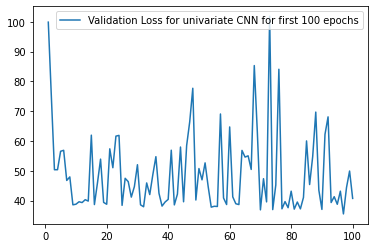

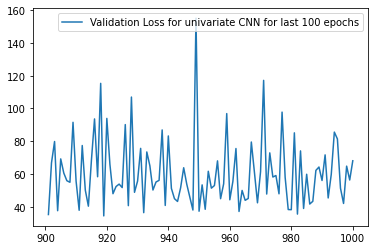

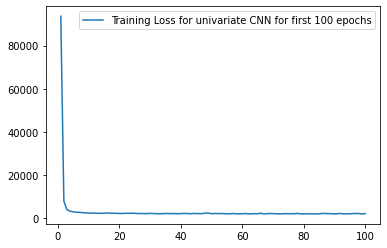

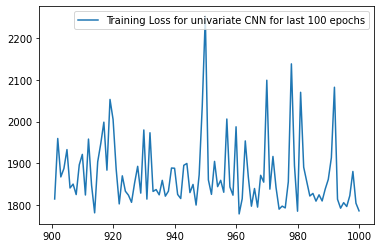

RMSE For training dataset having 4 years of data is : 6.2844143913188075


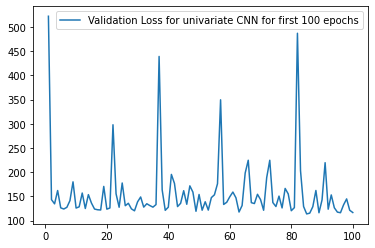

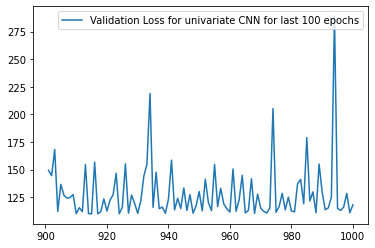

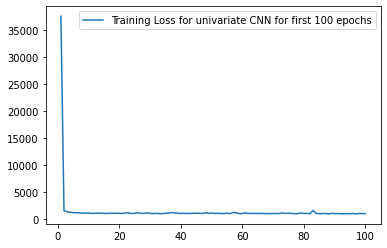

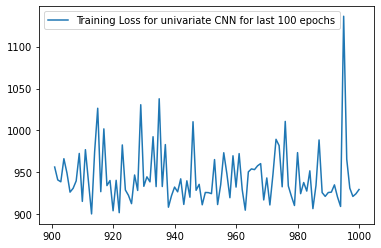

RMSE For training dataset having 8 years of data is : 8.238432484798516


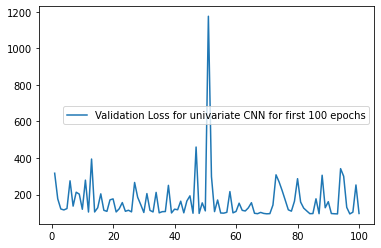

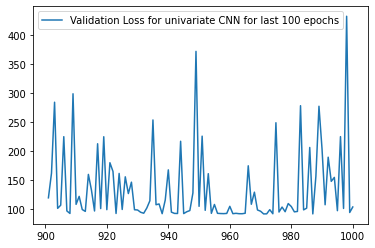

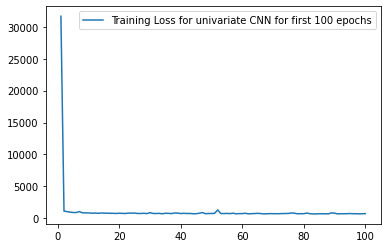

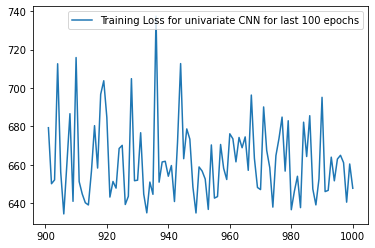

RMSE For training dataset having 12 years of data is : 12.849960000650297


In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
closing_univariate_data = list(df["Close"])
# choose a number of time steps
n_steps = 5
model_arr = []
first_index = [900,1900,2800]
second_index = [1100,2100,3000]
third_index = [1300,2300,3200]
# split into samples
X, y = split_sequence(closing_univariate_data, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
for i in range(3):
	X_train,y_train = X[0:first_index[i]],y[0:first_index[i]]
	X_val,y_val = X[first_index[i]:second_index[i]],y[first_index[i]:second_index[i]]
	X_test,y_test = X[second_index[i]:third_index[i]],y[second_index[i]:third_index[i]]
	# define model
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(200, activation='relu'))
	model.add(Dense(1))
	model.compile(optimizer='adam', loss='mse')
	# fit model
	n_epochs = 1000
	# for i in range(n_epochs):
	model.fit(X_train, y_train, epochs=n_epochs, batch_size = 45,validation_data = (X_val,y_val),verbose = 0)
	plt.plot([i for i in range(1,101)],model.history.history["val_loss"][0:100],label = "Validation Loss for univariate CNN for first 100 epochs")
	plt.legend()
	plt.show()
	plt.plot([i for i in range(901,1001)],model.history.history["val_loss"][900:1000],label = "Validation Loss for univariate CNN for last 100 epochs")
	plt.legend()
	plt.show()
	plt.plot([i for i in range(1,101)],model.history.history["loss"][0:100],label = "Training Loss for univariate CNN for first 100 epochs")
	plt.legend()
	plt.show()
	
	plt.plot([i for i in range(901,1001)],model.history.history["loss"][900:1000],label = "Training Loss for univariate CNN for last 100 epochs")
	plt.legend()
	model_arr.append(model)

	plt.show()
	y_pred = model.predict(X_test)
	error = sqrt(mean_squared_error(y_test,y_pred))
	print(f'RMSE For training dataset having {4*(i+1)} years of data is : {error}')

In [6]:
import pickle

In [9]:
for i in range(3):
    pickle.dump(model_arr[i], open(default_path+'CNN_'+str(4*(i+1))+' years '+str(n_steps)+' window', 'wb'))
    

INFO:tensorflow:Assets written to: ram://e7c442d1-ca34-421a-9857-261326b2b84b/assets
INFO:tensorflow:Assets written to: ram://803ac2ca-5c1b-4571-b54a-a49478e5c0d7/assets
INFO:tensorflow:Assets written to: ram://06284bac-0129-4cbc-ad78-6b97e6b94dd3/assets


In [12]:
load_models = []
for i in range(3):
    pickled_model = pickle.load(open(default_path+'CNN_'+str(4*(i+1))+' years '+str(n_steps)+' window', 'rb'))
    load_models.append(pickled_model)